In [1]:
#https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [1]:
path="D:\\Mark\\python\\Python-with-ML\\Data"

In [2]:
import pandas as pd

In [3]:
iris=pd.read_csv(path+"\\iris.csv")

In [4]:
iris.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris=iris.drop(["Unnamed: 0"],axis=1)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
target = iris['species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = iris.drop(iris.index[rows])

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
sepal_length    100 non-null float64
sepal_width     100 non-null float64
petal_length    100 non-null float64
petal_width     100 non-null float64
species         100 non-null object
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


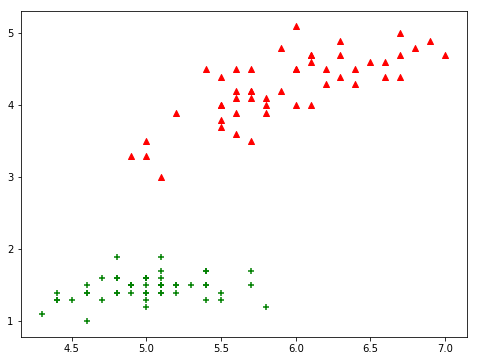

In [11]:
import matplotlib.pyplot as plt

x = df['sepal_length']
y = df['petal_length']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='^',color='red')
plt.show()

In [12]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
import numpy as np
## Drop rest of the features and extract the target values
df = df.drop(['sepal_width','petal_width'],axis=1)
Y = []
target = df['species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['species'],axis=1)
X = df.values.tolist()
## Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
## Support Vector Machine 
import numpy as np

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.0001

while(epochs < 10000):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train
    #print(epochs)
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1
    epochs += 1

In [19]:
from sklearn import metrics

## Clip the weights 
index = list(range(10,90))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)
## Extract the test data features 
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)
## Predict
y_pred = w1 * test_f1 + w2 * test_f2
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

print(metrics.accuracy_score(y_test,predictions))
print(metrics.recall_score(y_test,predictions))
print(metrics.precision_score(y_test,predictions))

1.0
1.0
1.0


In [18]:
#using sklear base model
from sklearn.svm import SVC
from sklearn import metrics

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))

1.0
1.0
1.0


C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
X=iris[["sepal_length","petal_length"]]
#y=iris.species
Y = []
target = iris.species
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
y=Y

In [15]:
X.loc[:,"sepal_length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [16]:
# create a mesh to plot in
x_min, x_max = X.loc[:, "sepal_length"].min() - 1, X.loc[:, "sepal_length"].max() + 1
y_min, y_max = X.loc[:, "petal_length"].min() - 1, X.loc[:, "petal_length"].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

In [19]:
svc = SVC(kernel='linear', C=1,gamma="auto").fit(X, y)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

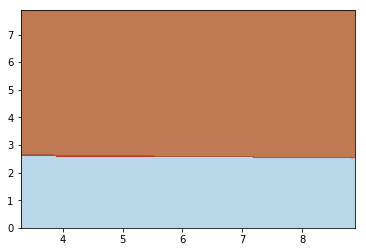

In [21]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

In [22]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [23]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma="auto").fit(X, y)

In [25]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

In [26]:
#gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

#C: Penalty parameter C of the error term. It also controls the trade off between smooth decision boundary and classifying the training points correctly.



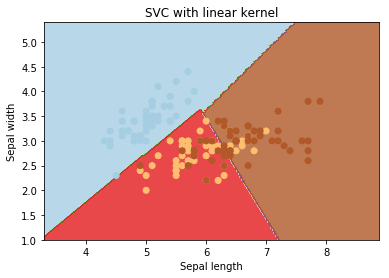

In [27]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [28]:
svc = svm.SVC(kernel='rbf', C=1,gamma="auto").fit(X, y)

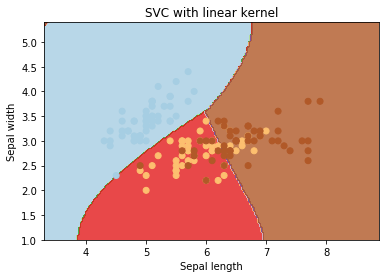

In [29]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [30]:
svc = svm.SVC(kernel='rbf', C=1,gamma=100).fit(X, y)

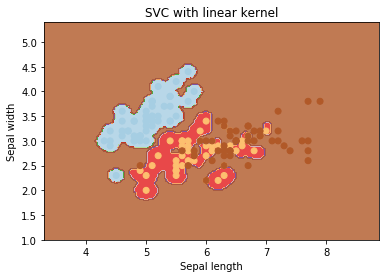

In [31]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()